<a href="https://colab.research.google.com/github/das2002/Remote-Sensing-Beaverworks/blob/master/CAP_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

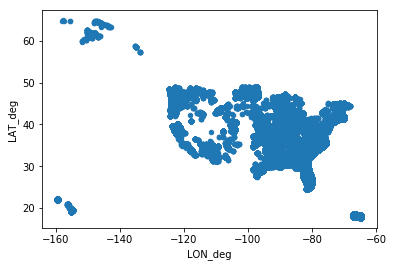

In [0]:
import io
import pandas
data = pandas.read_csv('17-Jul-2019-T_CAPmeta.csv')
data.plot(x='LON_deg', y= 'LAT_deg', kind = 'scatter', style = 'x' )

In [0]:
data.groupby('MONTH').count().idxmax()['FILENAME']


9

In [0]:
data.groupby('STATEFP').count().idxmax()['FILENAME']

48

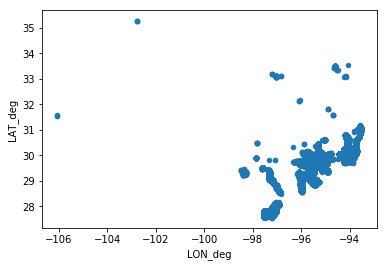

In [0]:
data.query('STATEFP==48').plot(x='LON_deg', y= 'LAT_deg', kind = 'scatter', style = 'x' )

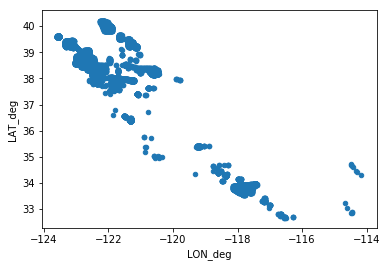

In [0]:
data.query('STATEFP==6').plot(x='LON_deg', y= 'LAT_deg', kind = 'scatter', style = 'x' )

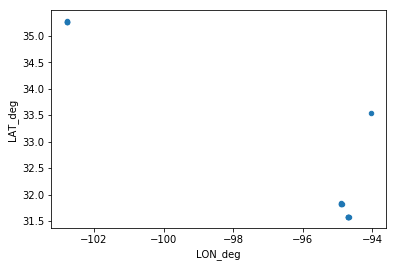

In [0]:
texas_2015 = data.query('STATEFP==48 & YEAR==2015')

texas_2015.plot(x='LON_deg', y= 'LAT_deg', kind = 'scatter', style = 'x' )
#texas_2015_coords = texas_2015.loc[384:392]
#texas_2015_coords_x = texas_2015_coords['LON_deg']
#print(type(texas_2015_coords_x))
#texas_2015_coords_y = texas_2015_coords['LAT_deg']
#print(texas_2015_coords_y)
#list_texas_2015_coords_x = []
#counter = 0
#while counter < len(texas_2015_coords_x):
 # tuple_coord = (texas_2015_coords_x[counter], texas_2015_coords_y[counter])
  #list_texas_2015_coords_x.append(tuple_coord)
  #counter+=1
  
#print(list_texas_2015_coords_x)
  
#texas_2015_coords.plot(x='LON_deg', y= 'LAT_deg', kind = 'scatter', style = 'x' )


In [0]:
point_coords = zip(building_centers['geometry'].x, building_centers['geometry'].y)
point_coords = np.array([[x,y] for x,y in point_coords])

In [0]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.datasets import make_blobs
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Coordinates of the Texas main campus in Decimal Degrees
coordinates_longx_2015 = 

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# convert to meters (UTM) from latlong
poly_m, poly_crs_m = ox.project_geometry(poly)
print(poly_crs_m)

# put a buffer of 1 mile (1609.34 m) to get everything w/in 1 mile
poly_with_buffer_m = poly_m.buffer(1609.34)
# get the bounding box
poly_with_buffer_m = poly_with_buffer_m.envelope

# convert back to lat-long
poly_with_buffer_ll, poly_crs_ll = ox.project_geometry(poly_with_buffer_m, 
                                                        crs=poly_crs_m, 
                                                        to_crs=fiona.crs.from_epsg(4326), 
                                                        to_latlong=True)

# get all walkable roads within poly
walkable_roads_near_mit = ox.graph_from_polygon(poly_with_buffer_ll, 
                                       network_type='walk',
                                       clean_periphery=True)

# we can get the footprints of objects within this poly
building_footprints = ox.footprints_from_polygon(poly_with_buffer_ll, 
                                                 footprint_type='building')

# drop rows where there's no shape info
building_footprints = building_footprints.loc[~building_footprints['geometry'].isna()]

# project to UTM
building_footprints_proj = ox.project_gdf(building_footprints)

